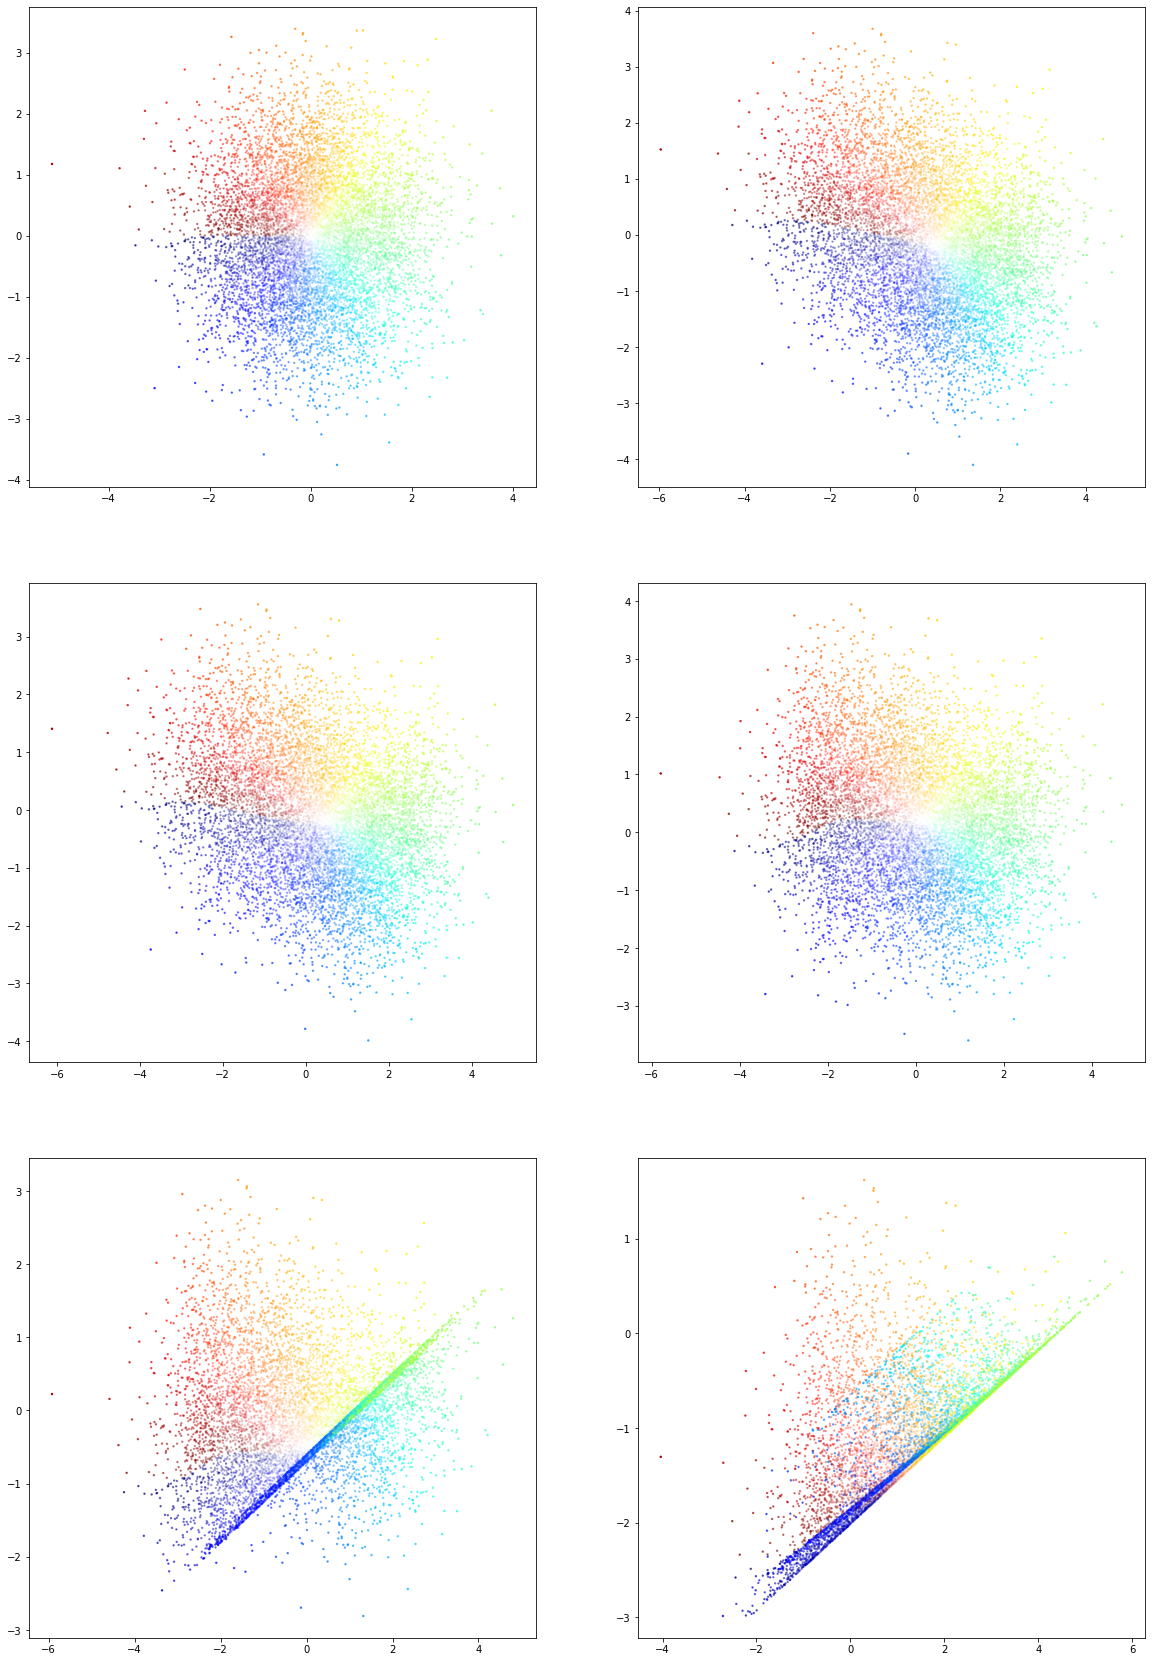

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

class H:
    def __init__(self):
        self.w = np.random.randn(2)
        self.b = np.random.randn(1)
        
    def h(self, z):
        return np.tanh(self.w.dot(z) + self.b)[0]

class PlanarFlow:
    def __init__(self):
        self.u = np.random.randn(2)
        self.h = H()
        
    def f(self, z):
        retVal = []
        
        for p in z:
            retVal.append(p + self.u * self.h.h(p))

        retVal = np.array(retVal)
        return retVal[:, 0].tolist(), retVal[:, 1].tolist()
    
pointNum = 10000
figRow = 3
figCol = 2
figNum = figRow * figCol

xs = [np.random.randn(pointNum)]
ys = [np.random.randn(pointNum)]
cs = []
alphaTmp = []

fig = plt.figure(figsize=(20,30))

for p in zip(xs[-1], ys[-1]):
    cs.append(np.arctan2(p[1], p[0]))
    alphaTmp.append(np.linalg.norm(p, ord=2))

maxAlpha = max(alphaTmp)
alphas = np.array(alphaTmp) / maxAlpha

f = []
for i in range(figNum):
    f.append(PlanarFlow())
    xsTmp, ysTmp = f[i].f(zip(xs[-1], ys[-1]))
    xs.append(xsTmp)
    ys.append(ysTmp)

ax = []
for i in range(figNum):
    ax.append(fig.add_subplot(figRow, figCol, i + 1))
    ax[i].scatter(xs[i], ys[i], c = cs, cmap = "jet", alpha = alphas, vmin = -np.pi, vmax = np.pi, s = 2)


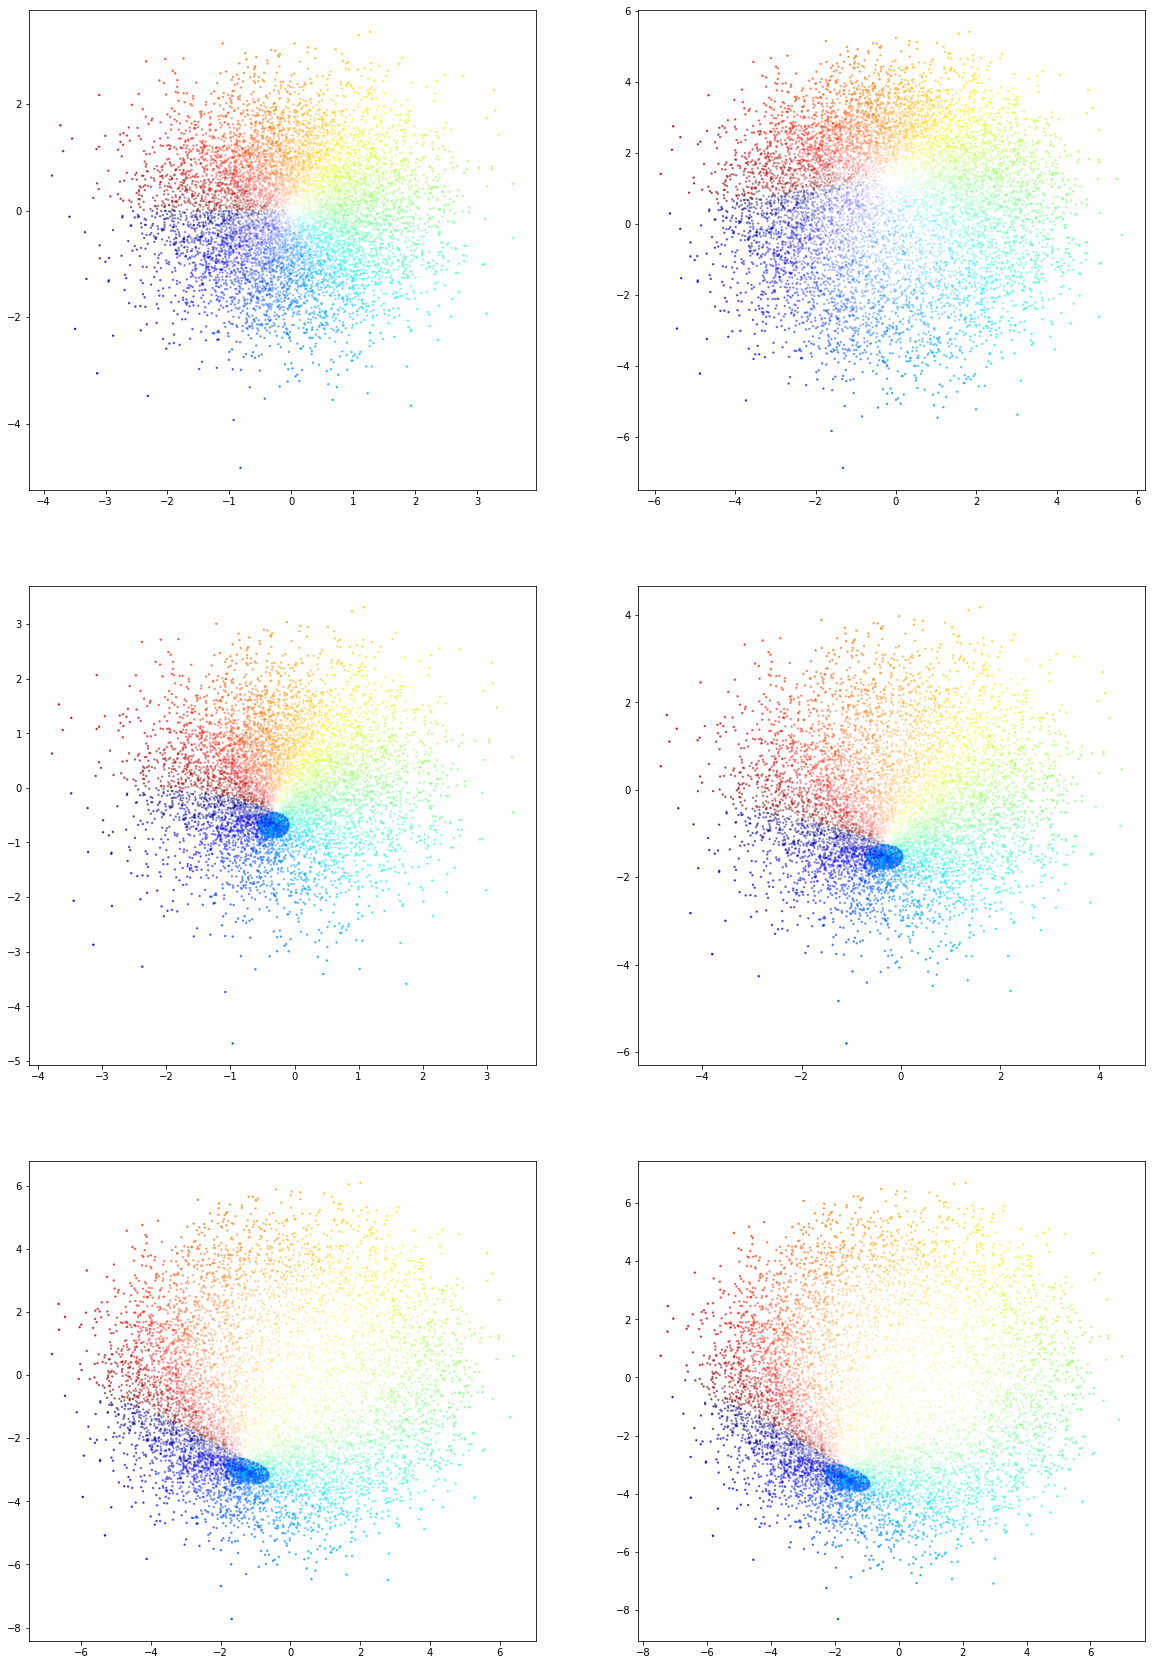

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

class H:
    def __init__(self):
        self.alpha = np.abs(np.random.randn(1))
        
    def h(self, r):
        return np.tanh(1 / (r + self.alpha))[0]

class RadialFlow:
    def __init__(self):
        self.zHat = np.random.randn(2)
        self.beta = 1.5 * np.random.randn(1)
        self.h = H()
        
    def f(self, z):
        retVal = []
        
        for p in z:
            r = np.linalg.norm((p - self.zHat), ord=2)
            retVal.append(p + self.beta * self.h.h(r) * (p - self.zHat))

        retVal = np.array(retVal)
        return retVal[:, 0].tolist(), retVal[:, 1].tolist()
    
pointNum = 10000
figRow = 3
figCol = 2
figNum = figRow * figCol

xs = [np.random.randn(pointNum)]
ys = [np.random.randn(pointNum)]
cs = []
alphaTmp = []

fig = plt.figure(figsize=(20,30))

for p in zip(xs[-1], ys[-1]):
    cs.append(np.arctan2(p[1], p[0]))
    alphaTmp.append(np.linalg.norm(p, ord=2))

maxAlpha = max(alphaTmp)
alphas = np.array(alphaTmp) / maxAlpha

f = []
for i in range(figNum - 1):
    f.append(RadialFlow())
    xsTmp, ysTmp = f[i].f(zip(xs[-1], ys[-1]))
    xs.append(xsTmp)
    ys.append(ysTmp)

ax = []
for i in range(figNum):
    ax.append(fig.add_subplot(figRow, figCol, i + 1))
    ax[i].scatter(xs[i], ys[i], c = cs, cmap = "jet", alpha = alphas, vmin = -np.pi, vmax = np.pi, s = 2)